<a href="https://colab.research.google.com/github/mkgreen/K-means-Clustering-Employee-Compensation/blob/main/Unsupervised_Learning_k_means_project_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Source of Data**
 The San Francisco Controller's Office maintains a database of the salary and benefits paid to City employees since fiscal year 2013. This data is summarized and presented on the Employee Compensation and is also available in CSV format in the directory.

##Overview of the problem

**Description of Data :**

Each row is an employee, and has columns about employee's information such as their job type, salary, hours of overtime, other benefits etc.Overall there are 22 columns.

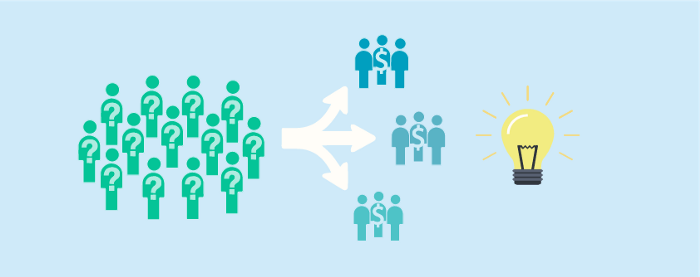

In [2]:
from IPython.display import Image
Image('/content/K.png')

#**Importing Libraries and Loading Data**

In [3]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv('/content/employee-compensation.csv')
df.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


# **Exploratory Data Analysis (EDA)**

In [5]:
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset contains 683277 rows and 22 columns.


In [6]:
# checking for missing data
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
print("Missing Value Counts + Percentages")
print("-"*34)
for feature in features_na:

    print(f"* {feature}: {df[feature].isna().sum()} values, {np.round(df[feature].isnull().mean(),4)}% of entries")
else:
    print()
    print("no other missing values found in dataset")

Missing Value Counts + Percentages
----------------------------------
* Department Code: 2 values, 0.0% of entries
* Department: 2 values, 0.0% of entries
* Union Code: 351 values, 0.0005% of entries
* Union: 351 values, 0.0005% of entries
* Job: 5 values, 0.0% of entries

no other missing values found in dataset


In [7]:
miss_val = df.isna().sum()

print("Missing Value Count by Feature:")
print("-"*31)
print(miss_val)

miss_val_count = miss_val.sum()

if miss_val_count == 0:
  print()
  print("There are no missing values in the dataset.")
else:
  print()
  print(f"There are {miss_val_count} missing values in this dataset.")

Missing Value Count by Feature:
-------------------------------
Organization Group Code      0
Job Family Code              0
Job Code                     0
Year Type                    0
Year                         0
Organization Group           0
Department Code              2
Department                   2
Union Code                 351
Union                      351
Job Family                   0
Job                          5
Employee Identifier          0
Salaries                     0
Overtime                     0
Other Salaries               0
Total Salary                 0
Retirement                   0
Health and Dental            0
Other Benefits               0
Total Benefits               0
Total Compensation           0
dtype: int64

There are 711 missing values in this dataset.


In [8]:
df = df.dropna()

In [9]:
df.isnull().values.any()

False

In [10]:
df.dtypes

Organization Group Code      int64
Job Family Code             object
Job Code                    object
Year Type                   object
Year                         int64
Organization Group          object
Department Code             object
Department                  object
Union Code                 float64
Union                       object
Job Family                  object
Job                         object
Employee Identifier          int64
Salaries                   float64
Overtime                   float64
Other Salaries             float64
Total Salary               float64
Retirement                 float64
Health and Dental          float64
Other Benefits             float64
Total Benefits             float64
Total Compensation         float64
dtype: object

In [11]:
columns = df.columns.values
print("Features: ",columns)

Features:  ['Organization Group Code' 'Job Family Code' 'Job Code' 'Year Type' 'Year'
 'Organization Group' 'Department Code' 'Department' 'Union Code' 'Union'
 'Job Family' 'Job' 'Employee Identifier' 'Salaries' 'Overtime'
 'Other Salaries' 'Total Salary' 'Retirement' 'Health and Dental'
 'Other Benefits' 'Total Benefits' 'Total Compensation']


In [12]:
print("Unique Value Counts by Feature")
print("*"*30)
col_name=df.columns
for i in col_name:
  print(i,':',df[i].nunique())

Unique Value Counts by Feature
******************************
Organization Group Code : 7
Job Family Code : 59
Job Code : 1210
Year Type : 2
Year : 8
Organization Group : 7
Department Code : 60
Department : 109
Union Code : 70
Union : 129
Job Family : 59
Job : 1348
Employee Identifier : 309658
Salaries : 498267
Overtime : 261976
Other Salaries : 307729
Total Salary : 614930
Retirement : 451568
Health and Dental : 209844
Other Benefits : 496051
Total Benefits : 616180
Total Compensation : 658354


In [13]:
df.describe()

,Organization Group Code,Year,Union Code,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
count,682919.000000,682919.000000,682919.000000,6.829190e+05,682919.000000,682919.000000,682919.000000,682919.000000,682919.000000,682919.000000,682919.000000,682919.000000,682919.000000
mean,2.977261,2016.364560,492.531570,1.709568e+07,69493.840390,5476.651604,3821.822312,78601.964004,13664.568361,9950.032677,5040.594347,28655.195384,107257.159388
std,1.579440,2.092694,330.911745,1.926007e+07,47766.600651,13112.641274,8388.286266,55745.985286,10109.190457,5732.227856,3787.819609,17866.946463,72282.967638
min,1.000000,2013.000000,1.000000,0.000000e+00,-68771.780000,-12308.660000,-19131.100000,-68771.780000,-30621.430000,-3831.090000,-10636.500000,-21295.150000,-74082.610000
25%,2.000000,2015.000000,250.000000,2.546200e+04,29073.460000,0.000000,0.000000,31756.370000,4679.095000,4784.540000,1872.705000,11748.130000,44540.265000
50%,2.000000,2017.000000,535.000000,5.099500e+04,67911.050000,0.000000,707.470000,74894.560000,13862.820000,12501.250000,4878.880000,32528.910000,107563.090000
75%,4.000000,2018.000000,790.000000,3.737713e+07,100451.055000,4226.340000,4365.000000,112692.195000,20155.985000,14037.160000,7527.095000,40920.955000,154201.665000
max,7.000000,2020.000000,990.000000,4.434643e+07,651936.710000,321523.310000,568163.120000,658867.570000,121952.520000,59405.230000,36815.390000,151645.180000,807625.250000


In [14]:
# remove outliers boxplot: union, organization
#keep: retirement , total salary, health, retirement, total benefit, total comp
#drop: year, salaries, retirement , OT, OS
# ****



In [15]:
print("Features: ",columns)

Features:  ['Organization Group Code' 'Job Family Code' 'Job Code' 'Year Type' 'Year'
 'Organization Group' 'Department Code' 'Department' 'Union Code' 'Union'
 'Job Family' 'Job' 'Employee Identifier' 'Salaries' 'Overtime'
 'Other Salaries' 'Total Salary' 'Retirement' 'Health and Dental'
 'Other Benefits' 'Total Benefits' 'Total Compensation']


In [16]:
df.drop(['Union Code','Year Type','Organization Group Code','Job Family Code','Year','Organization Group','Department Code','Job Family'],axis=1, inplace=True)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682919 entries, 0 to 683276
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Job Code             682919 non-null  object 
 1   Department           682919 non-null  object 
 2   Union                682919 non-null  object 
 3   Job                  682919 non-null  object 
 4   Employee Identifier  682919 non-null  int64  
 5   Salaries             682919 non-null  float64
 6   Overtime             682919 non-null  float64
 7   Other Salaries       682919 non-null  float64
 8   Total Salary         682919 non-null  float64
 9   Retirement           682919 non-null  float64
 10  Health and Dental    682919 non-null  float64
 11  Other Benefits       682919 non-null  float64
 12  Total Benefits       682919 non-null  float64
 13  Total Compensation   682919 non-null  float64
dtypes: float64(9), int64(1), object(4)
memory usage: 78.2+ MB


## **Data Preprocessing**


In [21]:
# creating a copy of the data
df1 = df.copy()

In [22]:
df1.dtypes

Job Code                object
Department              object
Union                   object
Job                     object
Employee Identifier      int64
Salaries               float64
Overtime               float64
Other Salaries         float64
Total Salary           float64
Retirement             float64
Health and Dental      float64
Other Benefits         float64
Total Benefits         float64
Total Compensation     float64
dtype: object

# **Selecting and encoding categorical data**

In [23]:
from sklearn.preprocessing import LabelEncoder

Le = LabelEncoder()
df1.columns

Index(['Job Code', 'Department', 'Union', 'Job', 'Employee Identifier',
       'Salaries', 'Overtime', 'Other Salaries', 'Total Salary', 'Retirement',
       'Health and Dental', 'Other Benefits', 'Total Benefits',
       'Total Compensation'],
      dtype='object')

In [24]:
for feature in df.columns:
  if df[feature].dtypes == 'object':
    df[feature] = pd.Categorical(df[feature]).codes

In [25]:
df1 = df.copy()
df1.head()

,Job Code,Department,Union,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,67,2,87,594,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,69,2,87,596,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,71,2,87,618,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,81,2,87,600,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,83,2,87,612,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [26]:
df1.dtypes

Job Code                 int16
Department                int8
Union                    int16
Job                      int16
Employee Identifier      int64
Salaries               float64
Overtime               float64
Other Salaries         float64
Total Salary           float64
Retirement             float64
Health and Dental      float64
Other Benefits         float64
Total Benefits         float64
Total Compensation     float64
dtype: object

# Removing Outliers from dataset

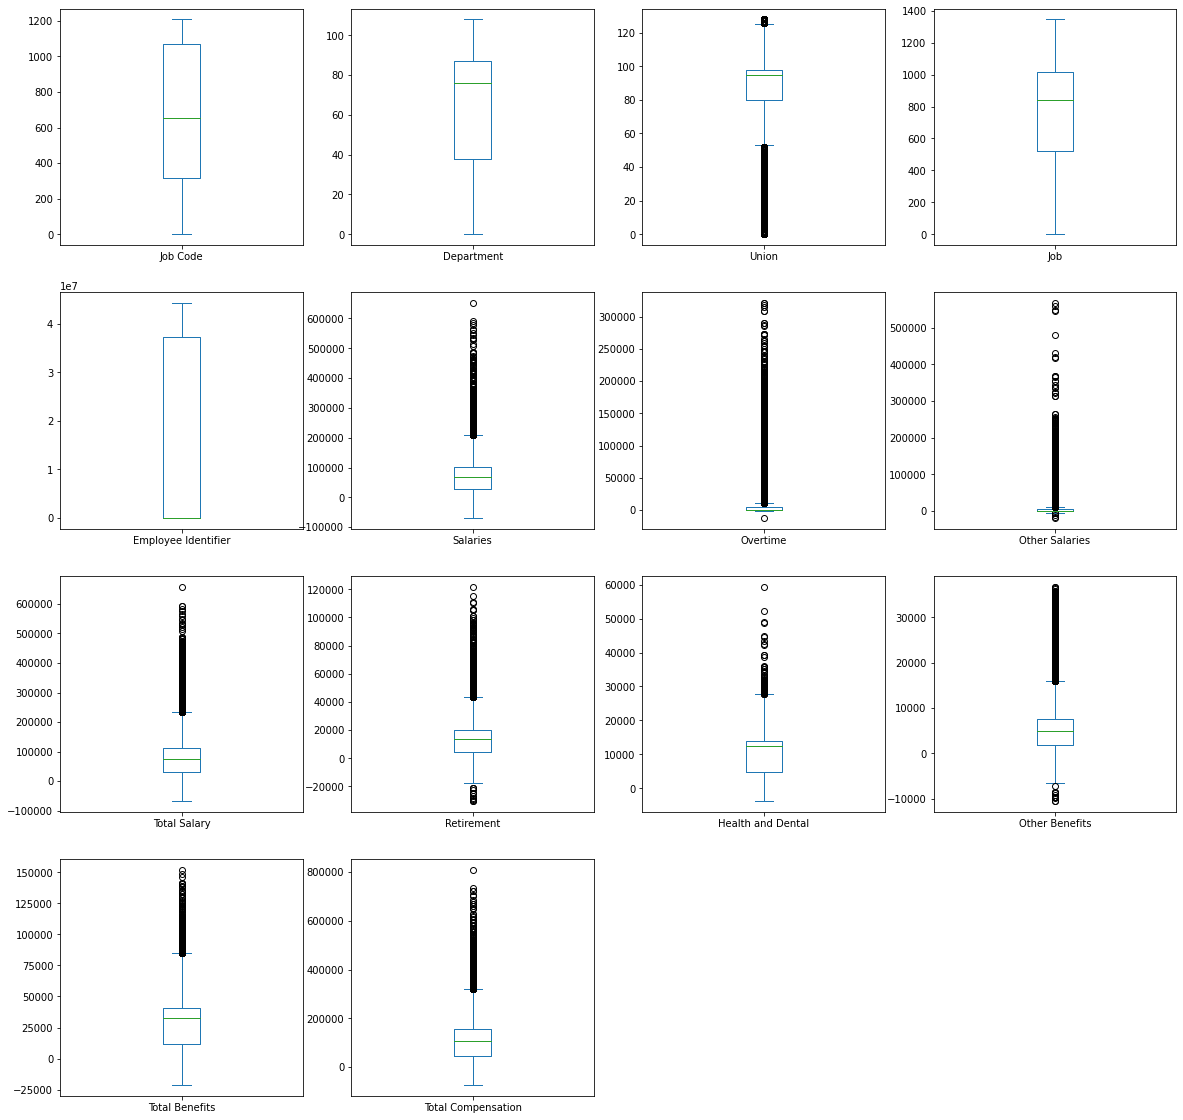

In [49]:
df1.plot(kind='box',subplots=True,layout=(4,4),figsize=(20,20))
plt.show()

In [50]:
Q1 = np.percentile(df1['Union'], 25, interpolation = 'midpoint')
Q2 = np.percentile(df1['Union'], 50, interpolation = 'midpoint')
Q3 = np.percentile(df1['Union'], 75, interpolation = 'midpoint')
print(f'(Q1) 25 percentile of the Union data: {Q1}')
print(f'(Q2) 50 percentile of the Union data: {Q2}')
print(f'(Q3) 75 percentile of the Union data: {Q3}')
print("")
IQR = Q3 - Q1
print(f'Interquartile range is {IQR}')
low_lim = Q1 -1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print(f'low limit: {low_lim}')
print(f'upper limit: {up_lim}')

df1['Union']= df1['Union'][df1['Union']< up_lim]
df1['Union']= df1['Union'][df1['Union']> low_lim]

(Q1) 25 percentile of the Union data: 80.0
(Q2) 50 percentile of the Union data: 95.0
(Q3) 75 percentile of the Union data: 98.0

Interquartile range is 18.0
low limit: 53.0
upper limit: 125.0


In [53]:
Q1 = np.percentile(df1['Salaries'], 25, interpolation = 'midpoint')
Q2 = np.percentile(df1['Salaries'], 50, interpolation = 'midpoint')
Q3 = np.percentile(df1['Salaries'], 75, interpolation = 'midpoint')
print(f'(Q1) 25 percentile of the Salaries data: {Q1}')
print(f'(Q2) 50 percentile of the Salaries data: {Q2}')
print(f'(Q3) 75 percentile of the Salaries data: {Q3}')
print("")
IQR = Q3 - Q1
print(f'Interquartile range is {IQR}')
low_lim = Q1 -1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print(f'low limit: {low_lim}')
print(f'upper limit: {up_lim}')

df1['Salaries']= df1['Salaries'][df1['Salaries']< up_lim]
df1['Salaries']= df1['Salaries'][df1['Salaries']> low_lim]

(Q1) 25 percentile of the Salaries data: 29073.46
(Q2) 50 percentile of the Salaries data: 67911.05
(Q3) 75 percentile of the Salaries data: 100451.055

Interquartile range is 71377.595
low limit: -77992.9325
upper limit: 207517.4475


In [56]:
Q1 = np.percentile(df1['Overtime'], 25, interpolation = 'midpoint')
Q2 = np.percentile(df1['Overtime'], 50, interpolation = 'midpoint')
Q3 = np.percentile(df1['Overtime'], 75, interpolation = 'midpoint')
print(f'(Q1) 25 percentile of the Overtime data: {Q1}')
print(f'(Q2) 50 percentile of the Overtime data: {Q2}')
print(f'(Q3) 75 percentile of the Overtime data: {Q3}')
print("")
IQR = Q3 - Q1
print(f'Interquartile range is {IQR}')
low_lim = Q1 -1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print(f'low limit: {low_lim}')
print(f'upper limit: {up_lim}')

df1['Overtime']= df1['Overtime'][df1['Overtime']< up_lim]
df1['Overtime']= df1['Overtime'][df1['Overtime']> low_lim]

(Q1) 25 percentile of the Overtime data: 0.0
(Q2) 50 percentile of the Overtime data: 0.0
(Q3) 75 percentile of the Overtime data: 4226.34

Interquartile range is 4226.34
low limit: -6339.51
upper limit: 10565.85


In [58]:
Q1 = np.percentile(df1['Other Salaries'], 25, interpolation = 'midpoint')
Q2 = np.percentile(df1['Other Salaries'], 50, interpolation = 'midpoint')
Q3 = np.percentile(df1['Other Salaries'], 75, interpolation = 'midpoint')
print(f'(Q1) 25 percentile of the Other Salaries data: {Q1}')
print(f'(Q2) 50 percentile of the Other Salaries data: {Q2}')
print(f'(Q3) 75 percentile of the Other Salaries data: {Q3}')
print("")
IQR = Q3 - Q1
print(f'Interquartile range is {IQR}')
low_lim = Q1 -1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print(f'low limit: {low_lim}')
print(f'upper limit: {up_lim}')

df1['Other Salaries']= df1['Other Salaries'][df1['Other Salaries']< up_lim]
df1['Other Salaries']= df1['Other Salaries'][df1['Other Salaries']> low_lim]

(Q1) 25 percentile of the Other Salaries data: 0.0
(Q2) 50 percentile of the Other Salaries data: 707.47
(Q3) 75 percentile of the Other Salaries data: 4365.0

Interquartile range is 4365.0
low limit: -6547.5
upper limit: 10912.5


In [61]:
Q1 = np.percentile(df1['Total Salary'], 25, interpolation = 'midpoint')
Q2 = np.percentile(df1['Total Salary'], 50, interpolation = 'midpoint')
Q3 = np.percentile(df1['Total Salary'], 75, interpolation = 'midpoint')
print(f'(Q1) 25 percentile of the Total Salary data: {Q1}')
print(f'(Q2) 50 percentile of the Total Salary data: {Q2}')
print(f'(Q3) 75 percentile of the Total Salary data: {Q3}')
print("")
IQR = Q3 - Q1
print(f'Interquartile range is {IQR}')
low_lim = Q1 -1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print(f'low limit: {low_lim}')
print(f'upper limit: {up_lim}')

df1['Total Salary']= df1['Total Salary'][df1['Total Salary']< up_lim]
df1['Total Salary']= df1['Total Salary'][df1['Total Salary']> low_lim]

(Q1) 25 percentile of the Total Salary data: 31756.370000000003
(Q2) 50 percentile of the Total Salary data: 74894.56
(Q3) 75 percentile of the Total Salary data: 112692.195

Interquartile range is 80935.82500000001
low limit: -89647.36750000002
upper limit: 234095.93250000002


In [63]:
Q1 = np.percentile(df1['Retirement'], 25, interpolation = 'midpoint')
Q2 = np.percentile(df1['Retirement'], 50, interpolation = 'midpoint')
Q3 = np.percentile(df1['Retirement'], 75, interpolation = 'midpoint')
print(f'(Q1) 25 percentile of the Retirement data: {Q1}')
print(f'(Q2) 50 percentile of the Retirement data: {Q2}')
print(f'(Q3) 75 percentile of the Retirement data: {Q3}')
print("")
IQR = Q3 - Q1
print(f'Interquartile range is {IQR}')
low_lim = Q1 -1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print(f'low limit: {low_lim}')
print(f'upper limit: {up_lim}')

df1['Retirement']= df1['Retirement'][df1['Retirement']< up_lim]
df1['Retirement']= df1['Retirement'][df1['Retirement']> low_lim]

(Q1) 25 percentile of the Retirement data: 4679.094999999999
(Q2) 50 percentile of the Retirement data: 13862.82
(Q3) 75 percentile of the Retirement data: 20155.985

Interquartile range is 15476.890000000001
low limit: -18536.240000000005
upper limit: 43371.32000000001


In [65]:
Q1 = np.percentile(df1['Health and Dental'], 25, interpolation = 'midpoint')
Q2 = np.percentile(df1['Health and Dental'], 50, interpolation = 'midpoint')
Q3 = np.percentile(df1['Health and Dental'], 75, interpolation = 'midpoint')
print(f'(Q1) 25 percentile of the Health and Dental data: {Q1}')
print(f'(Q2) 50 percentile of the Health and Dental data: {Q2}')
print(f'(Q3) 75 percentile of the Health and Dental data: {Q3}')
print("")
IQR = Q3 - Q1
print(f'Interquartile range is {IQR}')
low_lim = Q1 -1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print(f'low limit: {low_lim}')
print(f'upper limit: {up_lim}')

df1['Health and Dental']= df1['Health and Dental'][df1['Health and Dental']< up_lim]
df1['Health and Dental']= df1['Health and Dental'][df1['Health and Dental']> low_lim]

(Q1) 25 percentile of the Health and Dental data: 4784.54
(Q2) 50 percentile of the Health and Dental data: 12501.25
(Q3) 75 percentile of the Health and Dental data: 14037.16

Interquartile range is 9252.619999999999
low limit: -9094.39
upper limit: 27916.089999999997


In [67]:
Q1 = np.percentile(df1['Other Benefits'], 25, interpolation = 'midpoint')
Q2 = np.percentile(df1['Other Benefits'], 50, interpolation = 'midpoint')
Q3 = np.percentile(df1['Other Benefits'], 75, interpolation = 'midpoint')
print(f'(Q1) 25 percentile of the Other Benefits data: {Q1}')
print(f'(Q2) 50 percentile of the Other Benefits data: {Q2}')
print(f'(Q3) 75 percentile of the Other Benefits data: {Q3}')
print("")
IQR = Q3 - Q1
print(f'Interquartile range is {IQR}')
low_lim = Q1 -1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print(f'low limit: {low_lim}')
print(f'upper limit: {up_lim}')

df1['Other Benefits']= df1['Other Benefits'][df1['Other Benefits']< up_lim]
df1['Other Benefits']= df1['Other Benefits'][df1['Other Benefits']> low_lim]

(Q1) 25 percentile of the Other Benefits data: 1872.705
(Q2) 50 percentile of the Other Benefits data: 4878.88
(Q3) 75 percentile of the Other Benefits data: 7527.095

Interquartile range is 5654.39
low limit: -6608.880000000001
upper limit: 16008.68


In [69]:
Q1 = np.percentile(df1['Total Benefits'], 25, interpolation = 'midpoint')
Q2 = np.percentile(df1['Total Benefits'], 50, interpolation = 'midpoint')
Q3 = np.percentile(df1['Total Benefits'], 75, interpolation = 'midpoint')
print(f'(Q1) 25 percentile of the Total Benefits data: {Q1}')
print(f'(Q2) 50 percentile of the Total Benefits data: {Q2}')
print(f'(Q3) 75 percentile of the Total Benefits data: {Q3}')
print("")
IQR = Q3 - Q1
print(f'Interquartile range is {IQR}')
low_lim = Q1 -1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print(f'low limit: {low_lim}')
print(f'upper limit: {up_lim}')

df1['Total Benefits']= df1['Total Benefits'][df1['Total Benefits']< up_lim]
df1['Total Benefits']= df1['Total Benefits'][df1['Total Benefits']> low_lim]

(Q1) 25 percentile of the Total Benefits data: 11748.13
(Q2) 50 percentile of the Total Benefits data: 32528.91
(Q3) 75 percentile of the Total Benefits data: 40920.955

Interquartile range is 29172.825000000004
low limit: -32011.107500000006
upper limit: 84680.1925


In [71]:
Q1 = np.percentile(df1['Total Compensation'], 25, interpolation = 'midpoint')
Q2 = np.percentile(df1['Total Compensation'], 50, interpolation = 'midpoint')
Q3 = np.percentile(df1['Total Compensation'], 75, interpolation = 'midpoint')
print(f'(Q1) 25 percentile of the Total Compensation data: {Q1}')
print(f'(Q2) 50 percentile of the Total Compensation data: {Q2}')
print(f'(Q3) 75 percentile of the Total Compensation data: {Q3}')
print("")
IQR = Q3 - Q1
print(f'Interquartile range is {IQR}')
low_lim = Q1 -1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print(f'low limit: {low_lim}')
print(f'upper limit: {up_lim}')

df1['Total Compensation']= df1['Total Compensation'][df1['Total Compensation']< up_lim]
df1['Total Compensation']= df1['Total Compensation'][df1['Total Compensation']> low_lim]

(Q1) 25 percentile of the Total Compensation data: 44540.265
(Q2) 50 percentile of the Total Compensation data: 107563.09
(Q3) 75 percentile of the Total Compensation data: 154201.665

Interquartile range is 109661.40000000001
low limit: -119951.835
upper limit: 318693.765


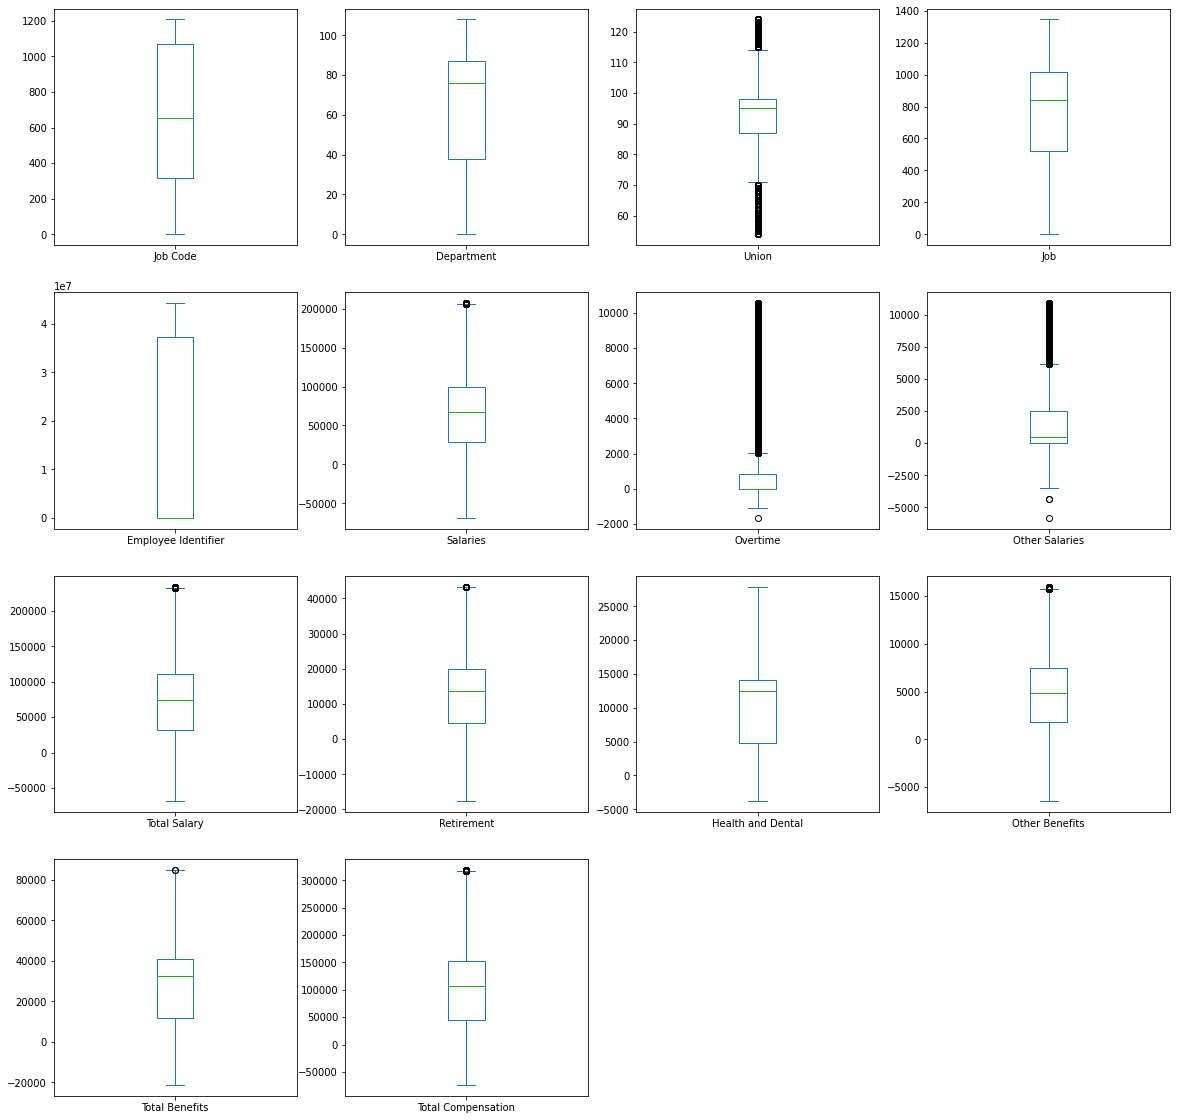

In [72]:
df1.plot(kind='box',subplots=True,layout=(4,4),figsize=(20,20))
plt.show()

In [24]:
# data.head()

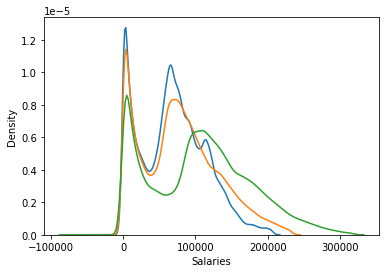

In [74]:
salaries = ['Salaries','Total Salary','Total Compensation']
for col in salaries:
  ax_salaries = sns.kdeplot(df1[col])
  ax_salaries

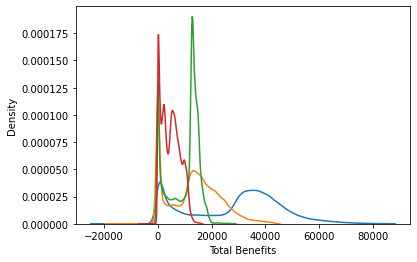

In [75]:
benefits= ['Total Benefits','Retirement','Health and Dental', 'Other Benefits']
for col in benefits:
  ax_benefits=sns.kdeplot(df1[col])
  ax_benefits

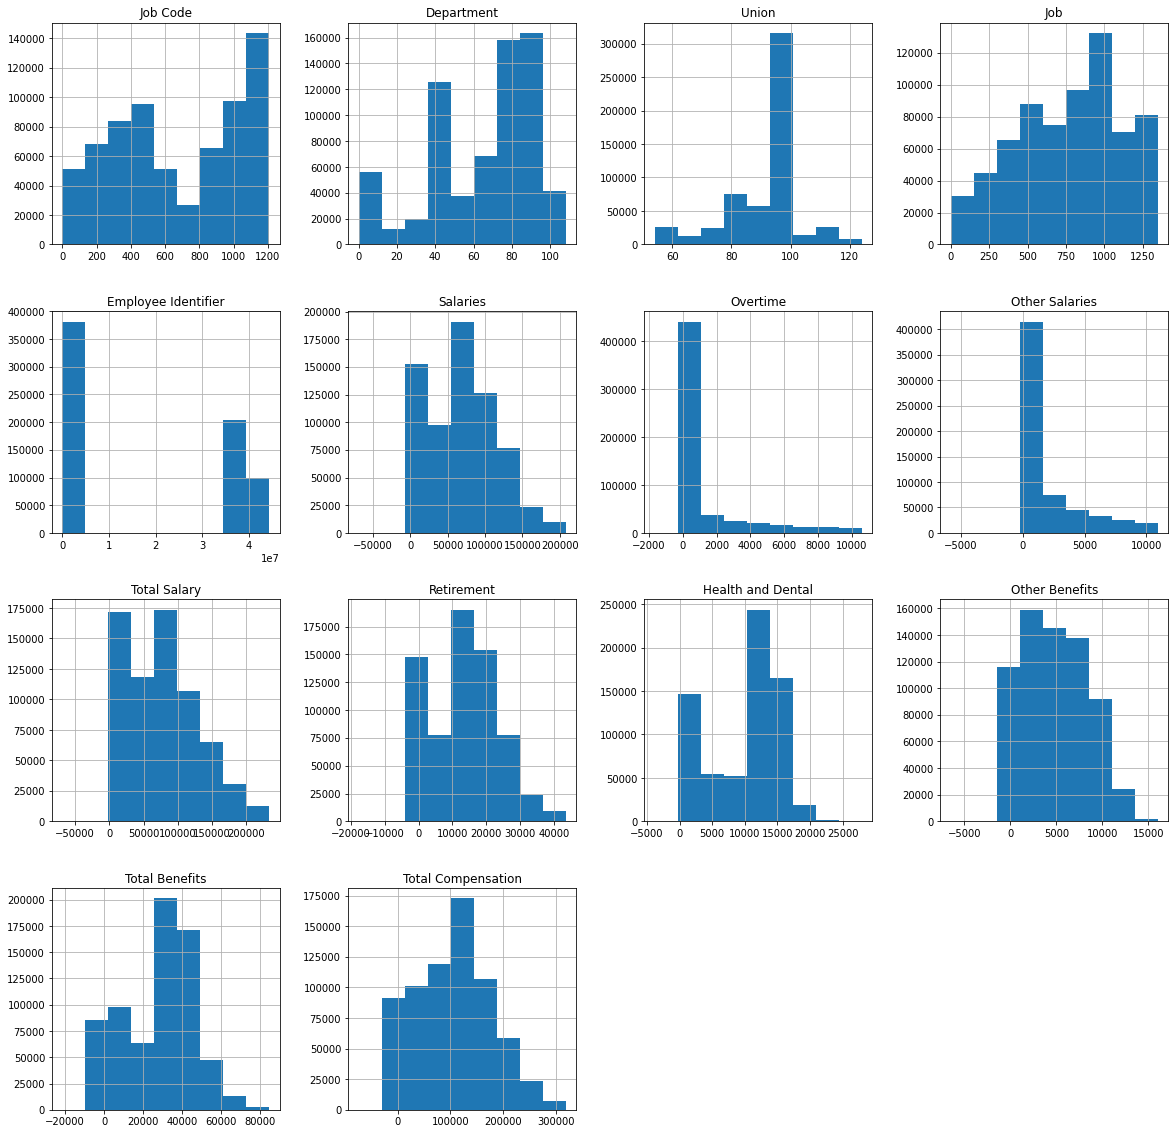

In [76]:
df1.hist(bins = 9, figsize = (20,20));